# Dataset and Objective

In this workbook, I trained an ANN (Artificial Neural Network) using Keras to classify tumors into Malignant or Benign type, when provided with the tumor's dimensions. In the output we will have probability of tumor of belonging to either Malignant or Benign class. The whole project is divided into 3 parts.

1. Data pre-processing and quick analysis
2. Building ANN
3. Making Predictions 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load and pre-process the dataset

In [3]:
from google.colab import files
uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
import io
# making data frame from csv file
#data = pd.read_csv("nba.csv", index_col ="Name")
bc_data=pd.read_csv(io.BytesIO(uploaded['Breast_Cancer.csv']))

Saving Breast_Cancer.csv to Breast_Cancer (1).csv


In [5]:
def dataSetAnalysis(df):
    #view starting values of data set
    print("Dataset Head")
    print(df.head(3))
    print("=" * 30)
    
    # View features in data set
    print("Dataset Features")
    print(df.columns.values)
    print("=" * 30)
    
    # View How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(df.info())
    print("=" * 30)
    
    # view distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(df.describe())
    print("=" * 30)
    
    # view distribution of categorical features across the data set
    print("Dataset Categorical Features")
    print(df.describe(include=['O']))
    print("=" * 30)

dataSetAnalysis(bc_data)

Dataset Head
         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758

[3 rows x 32 columns]
Dataset Features
['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
Dataset Features Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #  

In [10]:
X = bc_data.iloc[:, 2:]
print(X.head(10))
y = bc_data.iloc[:, 1]
print(y.head(10))

   radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678
5        12.45         15.70  ...          0.3985                  0.12440
6        18.25         19.98  ...          0.3063                  0.08368
7        13.71         20.83  ...          0.3196                  0.11510
8        13.00         21.82  ...          0.4378                  0.10720
9        12.46         24.04  ...          0.4366                  0.20750

[10 rows x 30 columns]
0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object


Notice that 'diagnosis' contains 'M' or 'B' to represent Malignant or Benign tumor. Let's encode them to 0 and 1.

In [11]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
print("Before encoding: ")
print(y[100:110])
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)
print("After encoding: ")
print(y[100:110])

Before encoding: 
100    M
101    B
102    B
103    B
104    B
105    M
106    B
107    B
108    M
109    B
Name: diagnosis, dtype: object
After encoding: 
[1 0 0 0 0 1 0 0 1 0]


# Spliting dataset into Train and test data

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

Now let's apply features scaling. Scaling ensures that just because some features are big, the model won't lead to using them as a main predictor 

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Preparing ANN

**Importing Keras packages and Initializing ANN**

Building the layers: 
Let's build the Layers. We can play around and change number of units but if we are not sure what number to initialize with then simply initialize the units of all layers except the last one with the (number of features + number of output nodes)/2 which equals to 15 in our case. My results were imporved by setting units = 16 for the first layer and decreasing the units in the hidden layers. Also we have to provide input dimension for the first layer only. 'relu' reffers to rectified linear unit and sigmoid reffers to sigmoid activation function. With the help of sigmoid activation function, we can get the probabilities of the classification which might be benificial in some cases to conduct further research.

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

In [19]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


input_dim - number of columns of the dataset

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

The ReLU function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this.

In [20]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [21]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


output_dim is 1 as we want only 1 output from the final layer.

Sigmoid function is used when dealing with classfication problems with 2 types of results.(Submax function is used for 3 or more classification results)

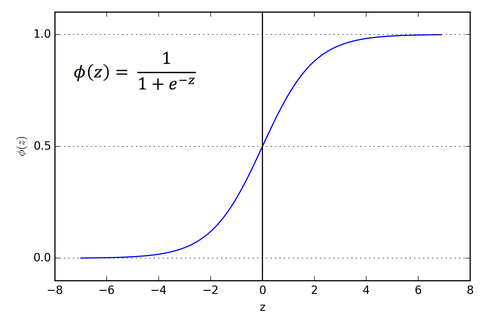



Compiling ANN

In [0]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used.

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0

**Fitting the ANN to training set**

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

You can try training it with batch size of 1 and 100 epochs and training accuracy was 99.12% and final predictions were 96.49% accurate.

In [24]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/150
455/455 [==============================] - 0s 792us/step - loss: 0.6929 - accuracy: 0.5538
Epoch 2/150
455/455 [==============================] - 0s 23us/step - loss: 0.6917 - accuracy: 0.6637
Epoch 3/150
455/455 [==============================] - 0s 21us/step - loss: 0.6900 - accuracy: 0.6747
Epoch 4/150
455/455 [==============================] - 0s 22us/step - loss: 0.6870 - accuracy: 0.7429
Epoch 5/150
455/455 [==============================] - 0s 24us/step - loss: 0.6824 - accuracy: 0.8396
Epoch 6/150
455/455 [==============================] - 0s 22us/step - loss: 0.6754 - accuracy: 0.9055
Epoch 7/150
455/455 [==============================] - 0s 22us/step - loss: 0.6662 - accuracy: 0.9209
Epoch 8/150
455/455 [==============================] - 0s 22us/step - loss: 0.6525 - accuracy: 0.9385
Epoch 9/150
455/455 [==============================] - 0s 21us/step - loss: 0.6333 - accuracy: 0.9341
Epoch 10/150
455/455 [==============================] - 0s 23us/step - loss: 0.60

In [0]:
from keras.models import load_model
#saving the Model
classifier.save('breast_cancer_model.h5') #Save trained ANN
#classifier = load_model('breast_cancer_model.h5')  #Load trained ANN

# Prediction of Test results

Now y_pred contains the probability of tumor being of type Malignant or Benign. We'll assign the results true or false based on their probabilities (if probability >= 0.5 than true else false)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

You may also use this alternative to compare

In [0]:
y_pred1 = classifier.predict(X_test)
y_pred1 = [ 1 if y>=0.5 else 0 for y in y_pred1 ]

# Confusion Matrix

To check our accuracy

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 189.4736842105263%


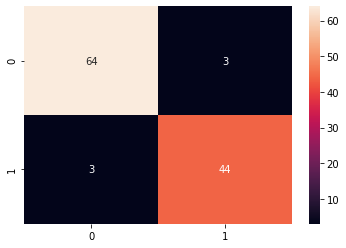

In [33]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [34]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

accuracy1 = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][0]+cm1[1][1])
print("Accuracy: "+ str(accuracy1*100)+"%")

[[64  3]
 [ 3 44]]
Accuracy: 94.73684210526315%


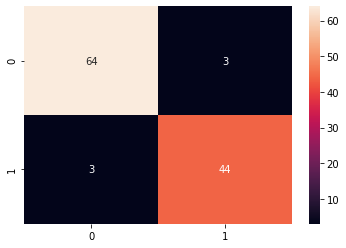

In [35]:
sns.heatmap(cm1,annot=True)
plt.savefig('h.png')

# References

https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann

https://www.kaggle.com/javapocalypse/breast-cancer-classification-in-keras-using-ann
